In [40]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [41]:
def simple_get(url):
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else :
                return None
    except RequestException as re:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


In [42]:
def is_good_response(resp):
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 and content_type is not None and content_type.find('html') > -1)

In [43]:
def log_error(e):
    print(e)

In [44]:

raw_html = simple_get('https://realpython.com/blog/')


In [45]:
raw_html = simple_get('http://www.fabpedigree.com/james/mathmen.htm')


In [46]:
raw_html = simple_get('https://www.bigbasket.com/pd/40053874')


89221
b'<!doctype html><html lang="en"  ><head>\n\t<meta charset="utf-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5, shrink-to-fit=no, user-scalable=yes">\n  <meta name="theme-color" content="#689f38">\n\n  <title data-react-helmet="true">Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price - bigbasket</title>\n  <meta data-react-helmet="true" name="description" content="Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price"/><meta data-react-helmet="true" name="keywords" content="Weikfield Chilli Vinegar, 200 g  "/><meta data-react-helmet="true" property="og:url" content="https://www.bigbasket.com/pd/40053874"/><meta data-react-helmet="true" property="og:type" content="website"/><meta data-react-helmet="true" property="og:title" content="Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price - bigbasket"/><meta data-react-helmet="true" property="og:description" content="Buy Weikfield Vinegar Chilli 200 Gm Online At Best Price"/><me
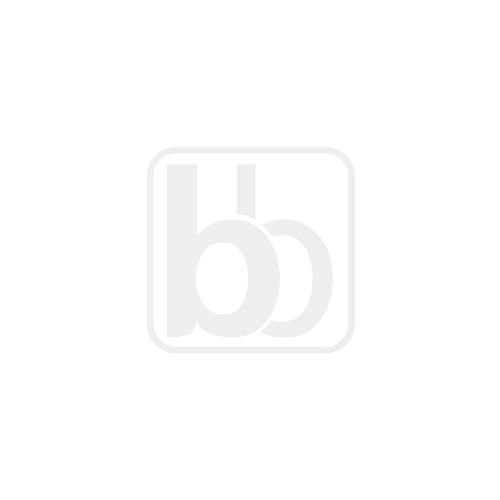
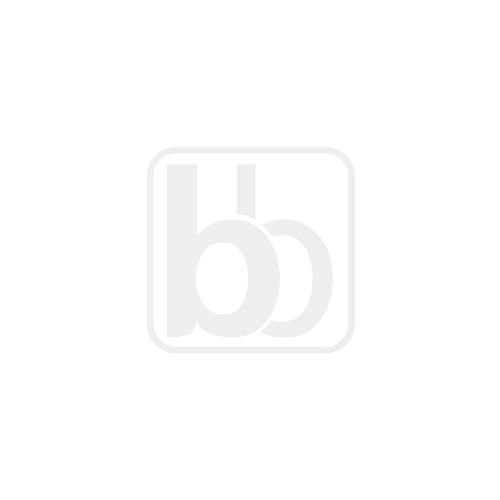
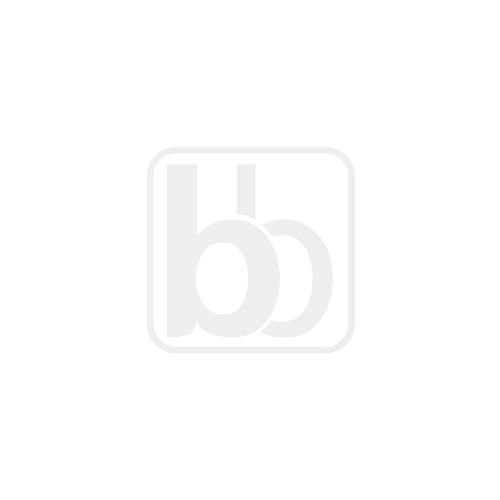
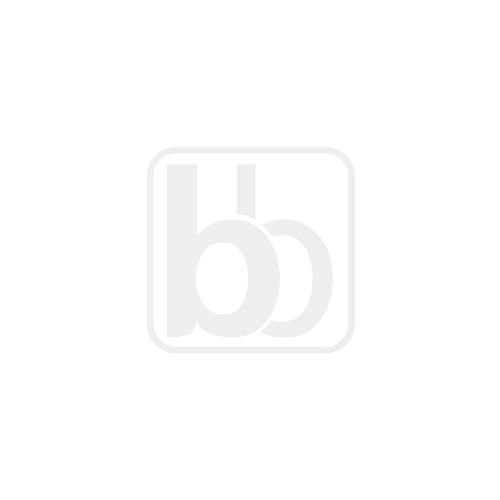
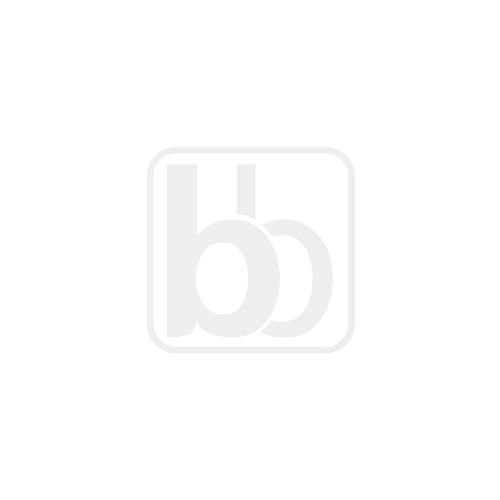

In [47]:
print(len(raw_html))
print(raw_html)

In [48]:

html = BeautifulSoup(raw_html, 'html.parser')
for i, li in enumerate(html.select('li')):
    print(i, li.text)

0 About Us
1 In News
2 Green bigbasket
3 Privacy Policy
4 Affiliate
5 Terms and Conditions
6 Careers At bigbasket
7 bb Instant
8 bb Daily
9 FAQs
10 Contact Us
11 bb Wallet FAQs
12 bb Wallet T&Cs
13 Vendor Connect
14 
15 
16 
17 
18 Sunflower Oils,
19 Wheat Atta,
20 Ghee,
21 Milk,
22 Health Drinks,
23 Flakes,
24 Organic F&V,
25 Namkeen,
26 Eggs,
27 Floor Cleaners,
28 Other Juices,
29 Leafy Vegetables,
30 Frozen Veg Food,
31 Diapers & Wipes,
32 Fresho,
33 bb Royal,
34 Nandini,
35 Kelloggs,
36 24 Mantra,
37 Saffola,
38 Lizol,
39 Safal,
40 Horlicks,
41 MTR,
42 Fresho Meats,
43 Whisper ,
44 Real,
45 Milky Mist,
46 Nivea,
47 Himalaya,
48 Comfort,
49 Sunpure ,
50 Bru ,
51 Zespri,
52 Bangalore, 
53 Hyderabad, 
54 Mumbai, 
55 Pune, 
56 Chennai, 
57 Delhi, 
58 Mysore, 
59 Coimbatore, 
60 Vijayawada-Guntur, 
61 Kolkata, 
62 Ahmedabad-Gandhinagar, 
63 Lucknow-Kanpur, 
64 Gurgaon, 
65 Vadodara, 
66 Visakhapatnam, 
67 Surat, 
68 Nagpur, 
69 Patna, 
70 Indore, 
71 Chandigarh Tricity, 
72 Jaipur, 
73 

In [49]:
def get_names(html):
    names = set()
    for i in html.select('li'):
#         print('li:', i)
        for name in i.text.split('\n'):
            if(len(name) > 0):
                names.add(name.strip())
    return list(names)

In [50]:
print(get_names(html))

['Lucknow-Kanpur,', 'Vadodara,', 'Organic F&V,', 'MTR,', 'Kochi,', 'Zespri,', 'Chandigarh Tricity,', 'bb Wallet T&Cs', 'CASH ON DELIVERY', 'Health Drinks,', 'Contact Us', 'Privacy Policy', 'Leafy Vegetables,', 'Whisper ,', 'Fresho Meats,', 'FAQs', 'Vijayawada-Guntur,', 'Other Juices,', 'Horlicks,', 'Hyderabad,', 'Namkeen,', '24 Mantra,', 'Vendor Connect', 'Saffola,', 'Nagpur,', 'Bhopal,', 'bb Daily', 'Ghee,', 'Mysore,', 'Delhi,', 'Kolkata,', 'Coimbatore,', 'Milk,', 'Nandini,', 'Bru ,', 'Comfort,', 'Patna,', 'Wheat Atta,', 'bb Royal,', 'bb Wallet FAQs', 'Pune,', 'Noida-Ghaziabad,', 'bb Instant', 'Gurgaon,', 'Fresho,', 'Careers At bigbasket', 'Lizol,', 'Visakhapatnam,', 'Diapers & Wipes,', 'Floor Cleaners,', 'Surat,', 'Green bigbasket', 'Himalaya,', 'Mumbai,', 'Terms and Conditions', 'Affiliate', 'Eggs,', 'Kelloggs,', 'Frozen Veg Food,', 'Sunflower Oils,', 'Milky Mist,', 'Sunpure ,', 'Ahmedabad-Gandhinagar,', 'Bangalore,', 'Chennai,', 'Nivea,', 'Safal,', 'Jaipur,', 'Flakes,', 'Real,', 'I

In [58]:
# specific to BigBasket.com
# find a particular element text with class 'GrE04' and header 'h1'
bigBasketProductInfo = html.find("h1", {"class": "GrE04"}).text  # .text will give us the text underlying that HTML element
print(bigBasketProductInfo)

Weikfield Chilli Vinegar, 200 g  


In [59]:
# now splitting the value to get the exact name of the product
bigBasketProductInfo.split(' ', 1)

['Weikfield', 'Chilli Vinegar, 200 g  ']

In [63]:
bigBasketBrandName = bigBasketProductInfo.split(' ', 1)[0]
print('brand:',bigBasketBrandName)

brand: Weikfield


In [64]:
# now get the brand name exactly
bigBasketProductName = bigBasketProductInfo.split(' ', 1)[1].split(',')[0]
print(bigBasketProductName)

Chilli Vinegar
